In [1]:
library(ggplot2)
library(maps) # De esta libreria podemos obtener algunos mapas
library(sf) # ! Necearia para los datos
library(ozmaps)
library(dplyr)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Pregunta 1:
Genere un objeto sf con la información del archivo TitulosHemeroteca.shp

In [2]:
hemeroteca <- st_read("TitulosHemeroteca/TitulosHemeroteca.shp")



Reading layer `TitulosHemeroteca' from data source 
  `/Users/miguela.monreal/CodigosVisInfo/TercerExamenParcial/TitulosHemeroteca/TitulosHemeroteca.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 94 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -17.76396 ymin: 28.46981 xmax: 3.20142 ymax: 43.65594
Geodetic CRS:  WGS 84


## Pregunta 2
 Desplegando el objeto

In [3]:
#ggplot()+geom_sf(data=hemeroteca)
print(head(hemeroteca))

Simple feature collection with 6 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -6.581785 ymin: 36.12978 xmax: -0.7694142 ymax: 39.48631
Geodetic CRS:  WGS 84
         poblacion          comunidad cantidad                    geometry
1         Abanilla             Murcia        1  POINT (-1.043499 38.20628)
2         Albacete Castilla-La Mancha        4   POINT (-1.86007 38.99765)
3        Algeciras   Andaluc<U+00ED>a        3  POINT (-5.447698 36.12978)
4     Almendralejo   Andaluc<U+00ED>a        1  POINT (-6.405679 38.68982)
5 Arroyo de la Luz        Extremadura        1  POINT (-6.581785 39.48631)
6             Aspe         Valenciana        1 POINT (-0.7694142 38.34857)


## Pregunta 3
Leyendo a las comunidades de España

In [4]:
comEsp <- st_read("esp.geojson")
print(head(comEsp$comunidad))

Reading layer `espa.geojson' from data source 
  `/Users/miguela.monreal/CodigosVisInfo/TercerExamenParcial/esp.geojson' 
  using driver `GeoJSON'
Simple feature collection with 52 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -18.16723 ymin: 27.64224 xmax: 4.337087 ymax: 43.79344
Geodetic CRS:  WGS 84
[1] "Ceuta"            "Melilla"          "Foral de Navarra" "Pa<U+00ED>s Vasco"
[5] "Arag<U+00F3>n"    "Catalu<U+00F1>a" 


## Pregunta 4
Revisando si el CRS de los dos objetos es el mismo: el de los dos es WGS 84

In [5]:
print("CRS de hemeroteca")
st_crs(hemeroteca)
print("CRS de las comunidades de Espania")
st_crs(comEsp)

[1] "CRS de hemeroteca"


Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

[1] "CRS de las comunidades de Espania"


Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

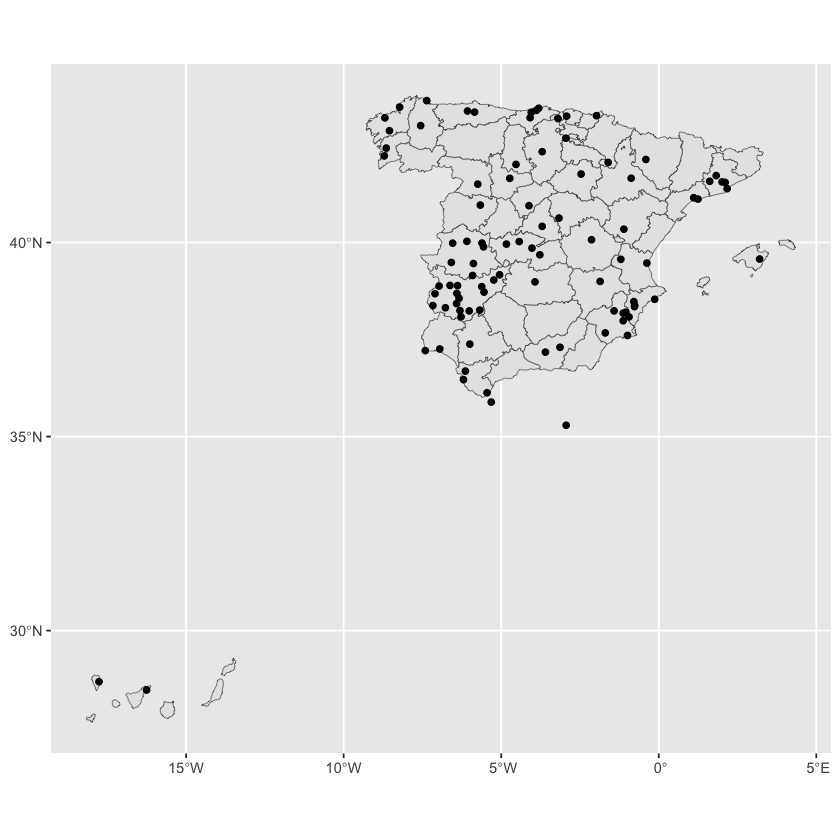

In [6]:
ggplot()+geom_sf(data=comEsp)+geom_sf(data=hemeroteca)

## Pregunta 5

In [7]:
#Limpiandolo 
hemeroteca1 <-  st_drop_geometry(hemeroteca)

hemeroteca2<- hemeroteca1 %>%
    group_by(comunidad) %>%
    summarise(Total_Cantidad = sum(cantidad, na.rm = TRUE))

In [11]:
hemeroteca <- hemeroteca %>%
    group_by(comunidad) %>%
    summarise(Total_Cantidad = sum(cantidad, na.rm = TRUE))

In [8]:
#realizamos el join
hem1 <- hemeroteca2 %>% left_join(comEsp, by = "comunidad")

In [9]:
centro <- st_centroid(hem1)

ERROR: Error in UseMethod("st_centroid"): no applicable method for 'st_centroid' applied to an object of class "c('tbl_df', 'tbl', 'data.frame')"


In [12]:
#Discretizando
hemeroteca <- hemeroteca %>%
    mutate(VentasD = cut(Total_Cantidad, breaks = 3, include.lowest = T))


Warning message:
"Using size for a discrete variable is not advised."


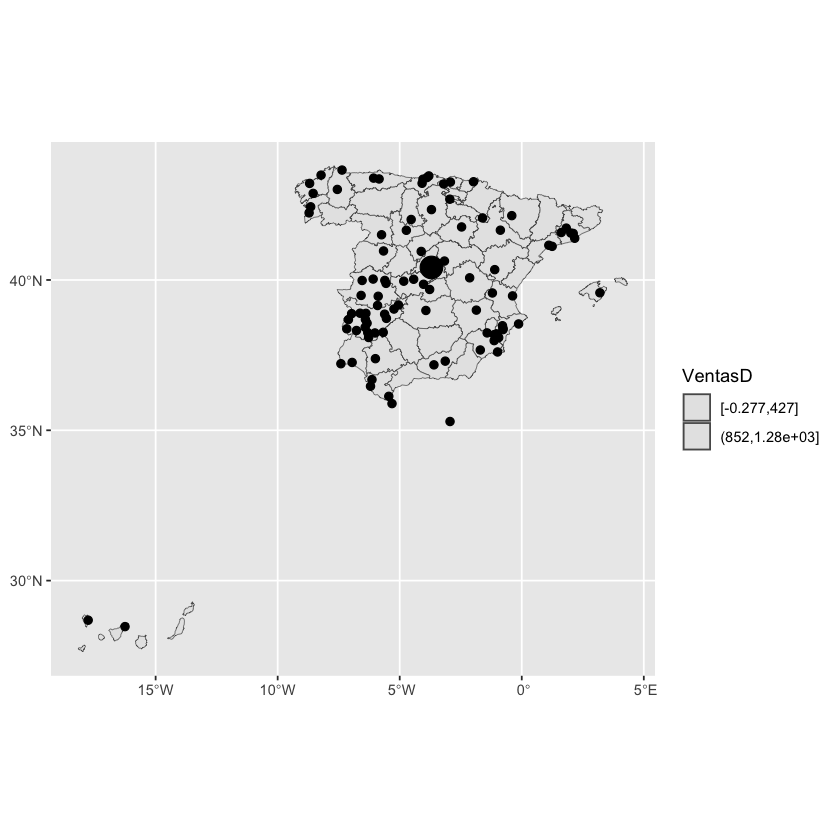

In [13]:
#print(head(hemeroteca))
ggplot() +
    geom_sf(data = comEsp) +
    geom_sf(data = hemeroteca, aes(size=VentasD))